In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### EDA

https://public.tableau.com/shared/6GC9KZ6DS?:display_count=n&:origin=viz_share_link


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_peptides = pd.read_csv('/content/drive/Shareddrives/ML@SJSU Members/Hands-on 2023/Parkinsons Disease/Data/train_peptides.csv')
train_peptides.shape

(981834, 6)

In [ ]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


### How many unique patients we have in the dataset?


In [ ]:
unique_patients = len(train_peptides.patient_id.unique())
print('Number of Unique Patients: ', unique_patients)

Number of Unique Patients:  248


### *Visualization* : Patient id in x axis and number of records in y axis

In [ ]:
# train_peptides.groupby('patient_id').nunique()

# patient_id, n_records = np.unique(train_peptides['patient_id'], return_counts=True)
# patient_id, n_records

# fig, ax = plt.subplots(figsize=(30,10))

# plt.bar(patient_id.astype(str), n_records)

# plt.xlabel('Patient ID')
# plt.ylabel('Number of Records')

# plt.show()

# num_of_visits = train_peptides['patient_id'].value_counts().head(10)
# num_of_visits.plot(kind='bar')

## Protein

In [ ]:
train_proteins = pd.read_csv('/content/drive/Shareddrives/ML@SJSU Members/Hands-on 2023/Parkinsons Disease/Data/train_proteins.csv')
train_proteins.shape

(232741, 5)

In [ ]:
train_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [ ]:
unique_protein = np.unique(train_proteins['UniProt'])

### **Visualization**: Patient id in x axis and number of proteins for each patient in y axis

In [ ]:
# uniprot_per_patient = train_proteins.groupby('patient_id')['UniProt'].nunique()
# uniprot_per_patient.plot(kind='bar')

# patient_id, n_records = np.unique(train_proteins['patient_id'], return_counts=True)
# patient_id, n_records

In [3]:
train_clinical_data = pd.read_excel('/content/drive/Shareddrives/ML@SJSU Members/Hands-on 2023/Parkinsons Disease/Data/train_clinical_data.xlsx')
train_clinical_data.shape

(2615, 8)

In [4]:
train_clinical_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [ ]:
# len(np.unique(train_clinical_data['patient_id']))

### Pivot Protein dataframe and merge with clinical data

In [ ]:
pivoted = train_proteins.pivot(index=['patient_id', 'visit_month'], columns='UniProt', values='NPX')
pivoted = pivoted.reset_index()

In [ ]:
pivoted

UniProt,patient_id,visit_month,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55,0,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,...,365475.0,35528.00,97005.6,23122.5,60912.6,408698.0,NaN,29758.8,23833.7,18953.5
1,55,6,13163.6,630465.0,35220.8,41295.0,26219.90,4416.42,165638.0,62567.5,...,405676.0,30332.60,109174.0,23499.8,51655.8,369870.0,NaN,22935.2,17722.5,16642.7
2,55,12,15257.6,815083.0,41650.9,39763.3,30703.60,4343.60,151073.0,66963.1,...,303953.0,43026.20,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
3,55,36,13530.8,753832.0,43048.9,43503.6,33577.60,5367.06,101056.0,67588.6,...,303597.0,48188.40,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1
4,942,6,11218.7,399518.0,20581.0,31290.9,6173.58,2564.37,160526.0,43423.1,...,253373.0,27431.80,93796.7,17450.9,21299.1,306621.0,82335.5,24018.7,18939.5,15251.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,64674,84,NaN,190487.0,24907.9,18543.1,10124.90,2308.71,62095.4,29248.7,...,260021.0,7139.93,104277.0,10500.0,21944.2,136725.0,62217.5,NaN,10287.7,13848.2
1109,65043,0,13472.4,927954.0,42661.5,43663.2,20071.30,3278.88,266339.0,117884.0,...,186414.0,25897.80,NaN,21480.7,57364.0,416142.0,37584.6,NaN,28346.5,35617.5
1110,65043,12,14134.9,984651.0,28990.8,42440.9,25357.40,3267.66,270575.0,108246.0,...,301343.0,22343.40,105626.0,20500.8,54011.2,380072.0,40588.9,NaN,17035.7,37064.2
1111,65043,24,14659.5,1062020.0,46440.4,38293.0,21971.80,3990.34,221358.0,117204.0,...,300439.0,52143.60,139291.0,19449.2,66569.9,300948.0,36150.4,NaN,21286.3,39587.9


In [ ]:
merged = pd.merge(train_clinical_data, pivoted, on=['patient_id', 'visit_month'])
merged

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,...,365475.0,35528.00,97005.6,23122.5,60912.6,408698.0,NaN,29758.8,23833.7,18953.5
1,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,...,405676.0,30332.60,109174.0,23499.8,51655.8,369870.0,NaN,22935.2,17722.5,16642.7
2,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,...,303953.0,43026.20,114921.0,21860.1,61598.2,318553.0,65762.6,29193.4,28536.1,19290.9
3,55_36,55,36,17.0,18.0,51.0,0.0,On,13530.8,753832.0,...,303597.0,48188.40,109794.0,23930.6,70223.5,377550.0,74976.1,31732.6,22186.5,21717.1
4,942_6,942,6,8.0,2.0,21.0,NaN,NaN,11218.7,399518.0,...,253373.0,27431.80,93796.7,17450.9,21299.1,306621.0,82335.5,24018.7,18939.5,15251.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,64674_84,64674,84,11.0,15.0,45.0,4.0,Off,NaN,190487.0,...,260021.0,7139.93,104277.0,10500.0,21944.2,136725.0,62217.5,NaN,10287.7,13848.2
1064,65043_0,65043,0,2.0,6.0,16.0,NaN,NaN,13472.4,927954.0,...,186414.0,25897.80,NaN,21480.7,57364.0,416142.0,37584.6,NaN,28346.5,35617.5
1065,65043_12,65043,12,4.0,7.0,14.0,0.0,Off,14134.9,984651.0,...,301343.0,22343.40,105626.0,20500.8,54011.2,380072.0,40588.9,NaN,17035.7,37064.2
1066,65043_24,65043,24,4.0,8.0,NaN,0.0,NaN,14659.5,1062020.0,...,300439.0,52143.60,139291.0,19449.2,66569.9,300948.0,36150.4,NaN,21286.3,39587.9


In [ ]:
merged.to_csv('/content/drive/Shareddrives/ML@SJSU Members/Hands-on 2023/Parkinsons Disease/Data/merged_data.csv', index=False)

In [ ]:
merged = pd.read_csv('/content/drive/Shareddrives/ML@SJSU Members/Hands-on 2023/Parkinsons Disease/Data/merged_data.csv')

In [ ]:
import missingno as msno

<Axes: >

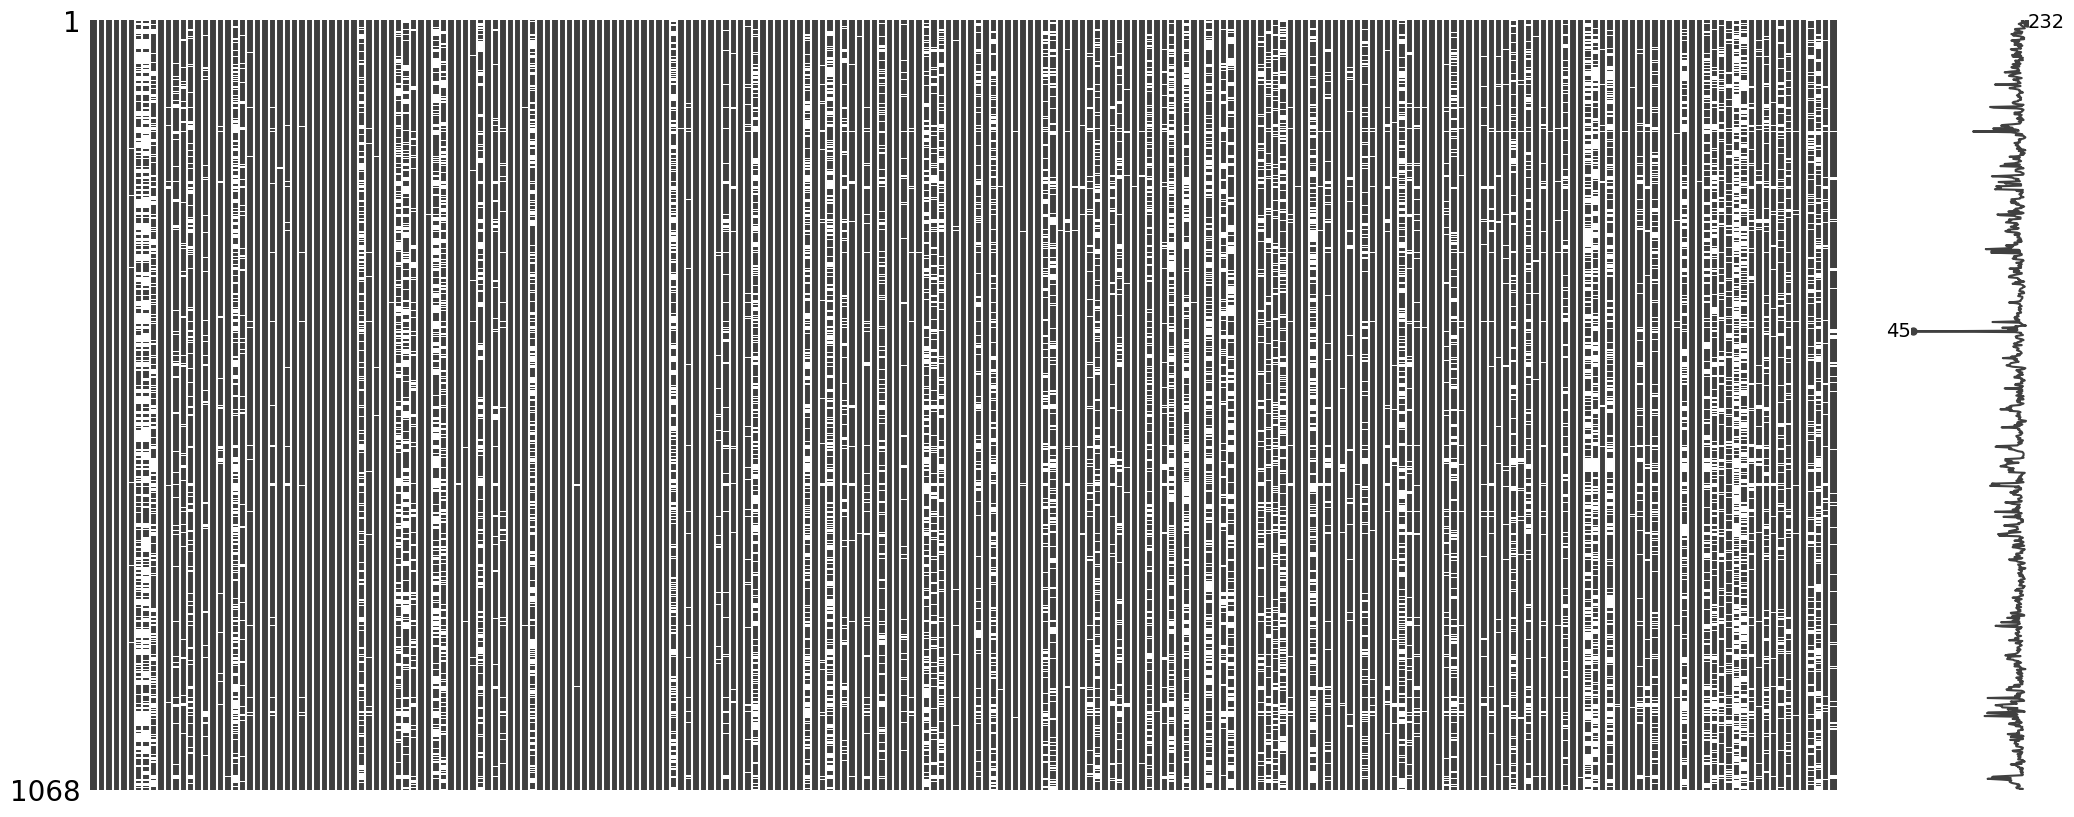

In [ ]:
msno.matrix(merged)

In [ ]:
pd.set_option('display.max_rows', None)

missing_values = merged.isna().mean()*100
print(missing_values.sort_values(ascending=False))

upd23b_clinical_state_on_medication    57.677903
Q99829                                 56.273408
updrs_4                                46.722846
Q99832                                 45.131086
Q562R1                                 44.569288
P01780                                 41.198502
Q6UX71                                 40.823970
O75326                                 38.108614
P06310                                 37.827715
P19827                                 37.078652
P36980                                 37.078652
P05408                                 36.235955
P02655                                 36.048689
P17936                                 35.674157
P19021                                 35.580524
P02792                                 35.393258
P60174                                 34.456929
Q6UXD5                                 34.082397
P04406                                 34.082397
P23083                                 32.865169
P01594              

In [ ]:
for i in unique_protein:
  merged[i] = merged.groupby('patient_id')[i].transform(lambda x: x.fillna(x.mean()))

<Axes: >

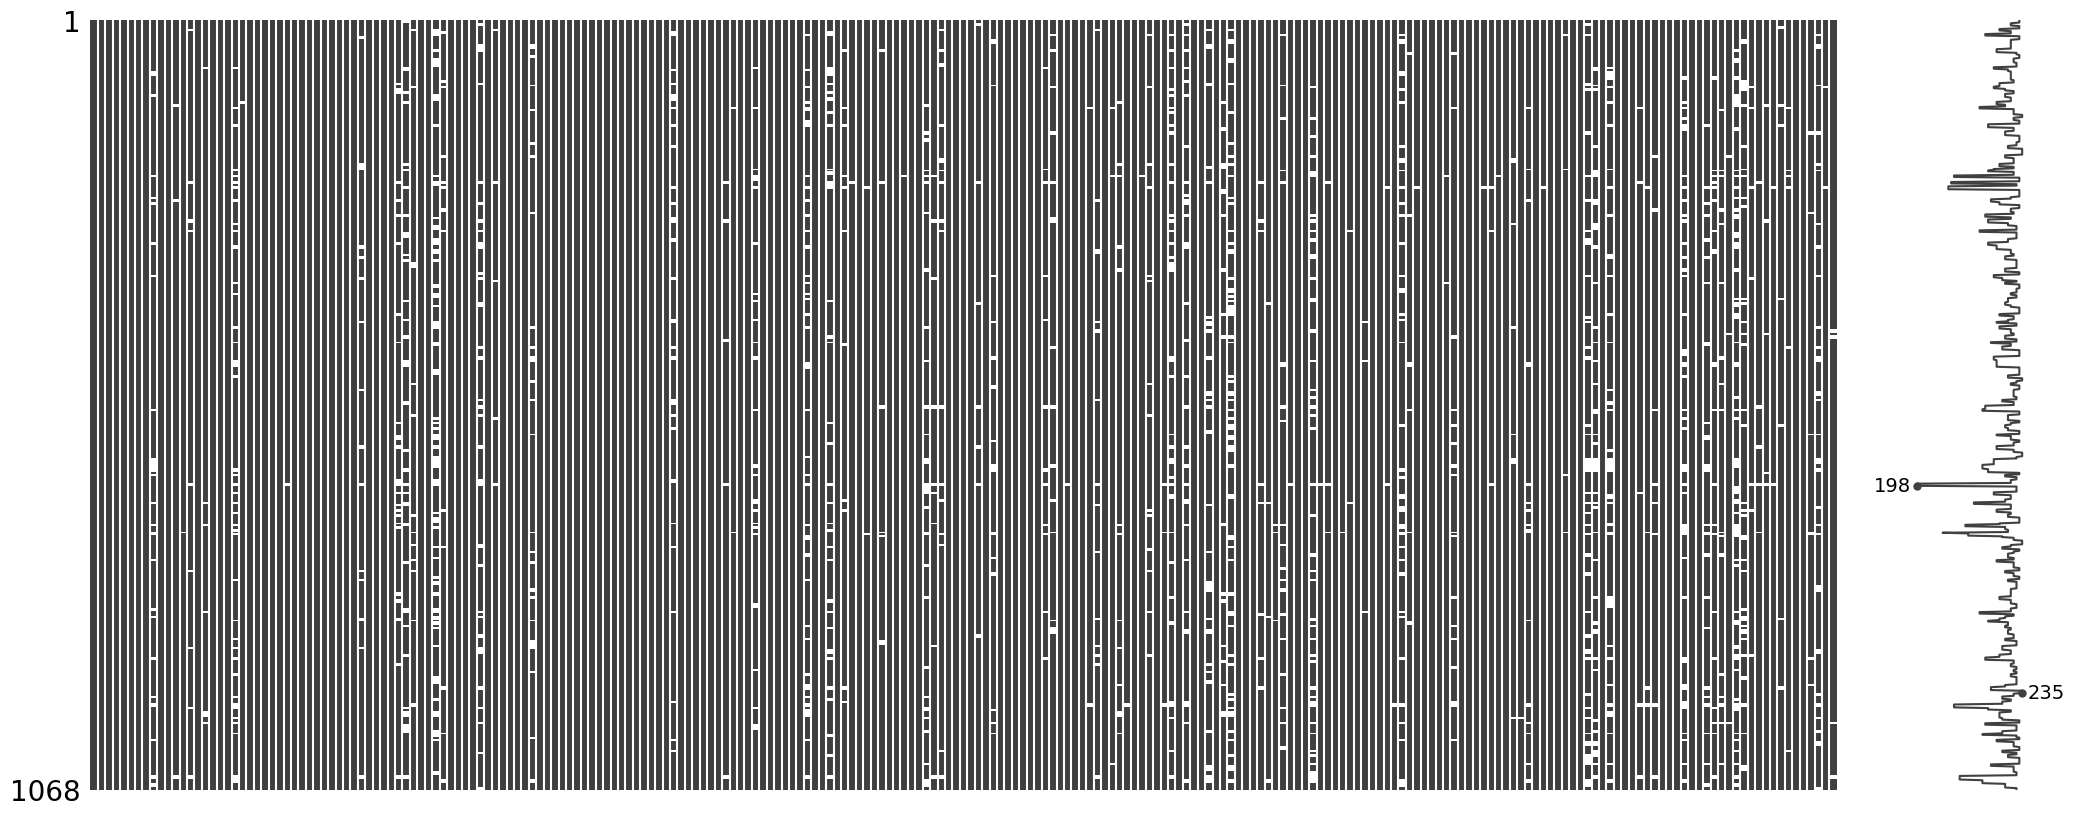

In [ ]:
msno.matrix(merged)

In [ ]:
missing_values = merged.isna().mean()*100
print(missing_values.sort_values(ascending=False))

P01780                                 25.187266
Q99829                                 23.501873
P23083                                 21.910112
Q96BZ4                                 17.041199
Q562R1                                 16.760300
P36980                                 16.573034
Q6UX71                                 15.917603
P05408                                 15.074906
Q6UXD5                                 14.606742
P17936                                 14.606742
P60174                                 14.419476
O75326                                 14.325843
P01594                                 14.138577
P01861                                 13.670412
P06310                                 13.202247
Q99832                                 12.734082
Q9UNU6                                 12.546816
P19827                                 12.078652
P19021                                 11.985019
P08123                                 11.423221
P02792              

In [ ]:
for i in unique_protein:
  merged[i].fillna(merged[i].mean(), inplace=True)

In [ ]:
missing_values = merged.isna().mean()*100
print(missing_values.sort_values(ascending=False))

visit_id                               0.0
P35542                                 0.0
P19823                                 0.0
P19827                                 0.0
P20774                                 0.0
P20933                                 0.0
P23083                                 0.0
P23142                                 0.0
P24592                                 0.0
P25311                                 0.0
P27169                                 0.0
P30086                                 0.0
P31997                                 0.0
P32754                                 0.0
P36222                                 0.0
P60174                                 0.0
P36955                                 0.0
P36980                                 0.0
P39060                                 0.0
P40925                                 0.0
P41222                                 0.0
P43121                                 0.0
P43251                                 0.0
P43652     

In [ ]:
# Filling Medication with Off
merged['upd23b_clinical_state_on_medication'] = merged['upd23b_clinical_state_on_medication'].fillna('off')

In [ ]:
# Filling UPDRS with Mean - Patient Specific
merged['updrs_4'] = merged.groupby('patient_id')['updrs_4'].transform(lambda x: x.fillna(x.mean()))
merged['updrs_3'] = merged.groupby('patient_id')['updrs_3'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
missing_values = merged.isna().mean()*100
print(missing_values.sort_values(ascending=False))

visit_id                               0.0
P35542                                 0.0
P19823                                 0.0
P19827                                 0.0
P20774                                 0.0
P20933                                 0.0
P23083                                 0.0
P23142                                 0.0
P24592                                 0.0
P25311                                 0.0
P27169                                 0.0
P30086                                 0.0
P31997                                 0.0
P32754                                 0.0
P36222                                 0.0
P60174                                 0.0
P36955                                 0.0
P36980                                 0.0
P39060                                 0.0
P40925                                 0.0
P41222                                 0.0
P43121                                 0.0
P43251                                 0.0
P43652     

In [ ]:
# Reset index of dataframe
merged = merged.reset_index()

# Calculate median of updrs_3 for each patient
median_by_patient = merged.groupby('patient_id')['updrs_3'].median()

# Fill null values in updrs_4 with the median of updrs_3 for each patient
for patient_id in median_by_patient.index:
    mask = (merged['patient_id'] == patient_id)
    median_value = median_by_patient.loc[patient_id]
    merged.loc[mask, 'updrs_4'] = merged.loc[mask, 'updrs_4'].fillna(median_value)

# Set the index back to the original index
merged = merged.set_index('index')


In [ ]:
merged.to_csv('/content/drive/Shareddrives/ML@SJSU Members/Hands-on 2023/Parkinsons Disease/Data/cleaned_data.csv', index=False)

------- Cleaned data

### 

In [ ]:
merged.shape

(1068, 235)

In [ ]:
merged = merged.drop('visit_id', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged['patient_id'] = le.fit_transform(merged['patient_id'])
merged['visit_month'] = le.fit_transform(merged['visit_month'])
merged['upd23b_clinical_state_on_medication'] = le.fit_transform(merged['upd23b_clinical_state_on_medication'])
merged

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,O00584,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,10.0,6.0,15.000000,0.000000,2,11254.300000,732430.0,39585.800000,...,365475.000000,35528.000000,97005.600000,23122.500000,60912.600000,408698.0,70369.350000,29758.800000,23833.700000,18953.500000
1,0,2,8.0,10.0,34.000000,0.000000,2,13163.600000,630465.0,35220.800000,...,405676.000000,30332.600000,109174.000000,23499.800000,51655.800000,369870.0,70369.350000,22935.200000,17722.500000,16642.700000
2,0,3,10.0,10.0,41.000000,0.000000,1,15257.600000,815083.0,41650.900000,...,303953.000000,43026.200000,114921.000000,21860.100000,61598.200000,318553.0,65762.600000,29193.400000,28536.100000,19290.900000
3,0,7,17.0,18.0,51.000000,0.000000,1,13530.800000,753832.0,43048.900000,...,303597.000000,48188.400000,109794.000000,23930.600000,70223.500000,377550.0,74976.100000,31732.600000,22186.500000,21717.100000
4,1,2,8.0,2.0,21.000000,0.000000,2,11218.700000,399518.0,20581.000000,...,253373.000000,27431.800000,93796.700000,17450.900000,21299.100000,306621.0,82335.500000,24018.700000,18939.500000,15251.200000
5,1,3,5.0,2.0,25.000000,0.000000,2,6757.320000,360858.0,18367.600000,...,45742.300000,33518.600000,94049.700000,13415.700000,21324.700000,234094.0,82410.400000,19183.700000,17804.100000,12277.000000
6,1,5,2.0,3.0,23.000000,0.000000,2,9867.940000,352722.0,22834.900000,...,180475.000000,29770.600000,95949.900000,11344.400000,23637.600000,256654.0,76931.900000,19168.200000,19215.900000,14625.600000
7,1,8,2.0,6.0,35.000000,0.000000,2,11627.800000,251820.0,22046.500000,...,197987.000000,29283.800000,121696.000000,19169.800000,16724.900000,232301.0,96905.900000,21120.900000,14089.800000,16418.500000
8,2,0,11.0,6.0,25.000000,5.000000,1,11648.900000,419015.0,35053.800000,...,306280.000000,24931.300000,111337.000306,12610.900000,40018.900000,164826.0,55379.800000,31563.000000,19771.600000,14699.500000


In [ ]:
# split the data 

from sklearn.model_selection import train_test_split

X = merged.drop(columns =  ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'patient_id', 'visit_month'] , axis=1)
y = merged[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((854, 228), (214, 228))

In [ ]:
# Updrs 1
# X_train
y_train_1 = y_train['updrs_1']
y_test_1 = y_test['updrs_1']

In [ ]:
def smape(actual, predicted):
    """
    Calculates the Symmetric Mean Absolute Percentage Error (SMAPE) between two arrays.
    actual: actual values
    predicted: predicted values
    """
    actual, predicted = np.array(actual), np.array(predicted)
    numerator = np.abs(actual - predicted)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    return np.mean(numerator / denominator) * 100

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
gbr = GradientBoostingRegressor()

# train the model

gbr.fit(X_train, y_train_1)

y_pred_1 = gbr.predict(X_test)
y_pred_train_1 = gbr.predict(X_train)

print(smape(y_test_1, y_pred_1), mean_squared_error(y_test_1, y_pred_1, squared=True))
print(smape(y_train_1, y_pred_train_1), mean_squared_error(y_train_1, y_pred_train_1, squared=True))

61.35608438701872 18.26316224297773
41.67662057329349 4.340597900704539


In [ ]:
rfr = RandomForestRegressor()

# train the model

rfr.fit(X_train, y_train_1)

y_pred_1 = rfr.predict(X_test)
y_pred_train_1 = rfr.predict(X_train)

print(smape(y_test_1, y_pred_1), mean_squared_error(y_test_1, y_pred_1, squared=True))
print(smape(y_train_1, y_pred_train_1), mean_squared_error(y_train_1, y_pred_train_1, squared=True))

65.13562260634826 20.234457009345792
34.2284082152692 2.7995398126463704


In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_1)

y_pred_1 = svr.predict(X_test)
y_pred_train_1 = svr.predict(X_train)

print(smape(y_test_1, y_pred_1), mean_squared_error(y_test_1, y_pred_1, squared=True))
print(smape(y_train_1, y_pred_train_1), mean_squared_error(y_train_1, y_pred_train_1, squared=True))

In [ ]:
param_grid = {'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6]}

# create the model
gbr = GradientBoostingRegressor()

# create the grid search object
grid_search = GridSearchCV(gbr, param_grid=param_grid, cv=5, n_jobs=-1)

# train the grid search object
grid_search.fit(X_train, y_train_1)

# print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Hyperparameter tuning
# Feature reduction